In [139]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os 
import sys

In [129]:
import os

# Specify the file or directory name
file_or_directory_name = "weather.csv"

# Get the absolute path of the current directory
current_directory = os.getcwd().split('UCL', 1)[0]
print(current_directory)

# Construct the path to the file or directory
file_or_directory_path = os.path.join(current_directory, file_or_directory_name)

# Print the path
print("Path to", file_or_directory_name, ":", file_or_directory_path)

# read the file and seperate the data into columns
df = pd.read_csv(file_or_directory_path, sep=';')

/Users/eirikbaekkelund/Desktop/
Path to weather.csv : /Users/eirikbaekkelund/Desktop/weather.csv


In [131]:
# make the first two rows to be columns and the third row to be the index and the rest of the rows to be the data
df.head()


,validdate,t_0m:C,effective_cloud_cover:octas,global_rad:W,diffuse_rad:W
0,2023-07-18T08:00:00Z,25.4,0,657.8,108.5
1,2023-07-18T08:05:00Z,25.7,0,664.9,109.7
2,2023-07-18T08:10:00Z,25.9,0,674.4,111.3
3,2023-07-18T08:15:00Z,26.1,0,697.7,115.1
4,2023-07-18T08:20:00Z,26.4,0,709.6,117.1


In [132]:
# Convert the column to datetime format
df["validdate"] = pd.to_datetime(df["validdate"])

# Extract the date and time components into separate columns
df["date"] = df["validdate"].dt.strftime("%m-%d")
df["time"] = df["validdate"].dt.strftime("%H:%M")


In [133]:
df['datetime'] = df['date'] + ' ' + df['time']

In [134]:
df.drop(['validdate'], axis=1, inplace=True)

In [135]:
df.head()

,t_0m:C,effective_cloud_cover:octas,global_rad:W,diffuse_rad:W,date,time,datetime
0,25.4,0,657.8,108.5,07-18,08:00,07-18 08:00
1,25.7,0,664.9,109.7,07-18,08:05,07-18 08:05
2,25.9,0,674.4,111.3,07-18,08:10,07-18 08:10
3,26.1,0,697.7,115.1,07-18,08:15,07-18 08:15
4,26.4,0,709.6,117.1,07-18,08:20,07-18 08:20


In [136]:
df.tail()

,t_0m:C,effective_cloud_cover:octas,global_rad:W,diffuse_rad:W,date,time,datetime
4124,26.1,7,332.0,287.2,08-01,15:40,08-01 15:40
4125,26.0,6,326.0,277.9,08-01,15:45,08-01 15:45
4126,25.9,6,319.8,268.4,08-01,15:50,08-01 15:50
4127,25.8,6,313.2,258.8,08-01,15:55,08-01 15:55
4128,25.7,6,306.3,249.2,08-01,16:00,08-01 16:00


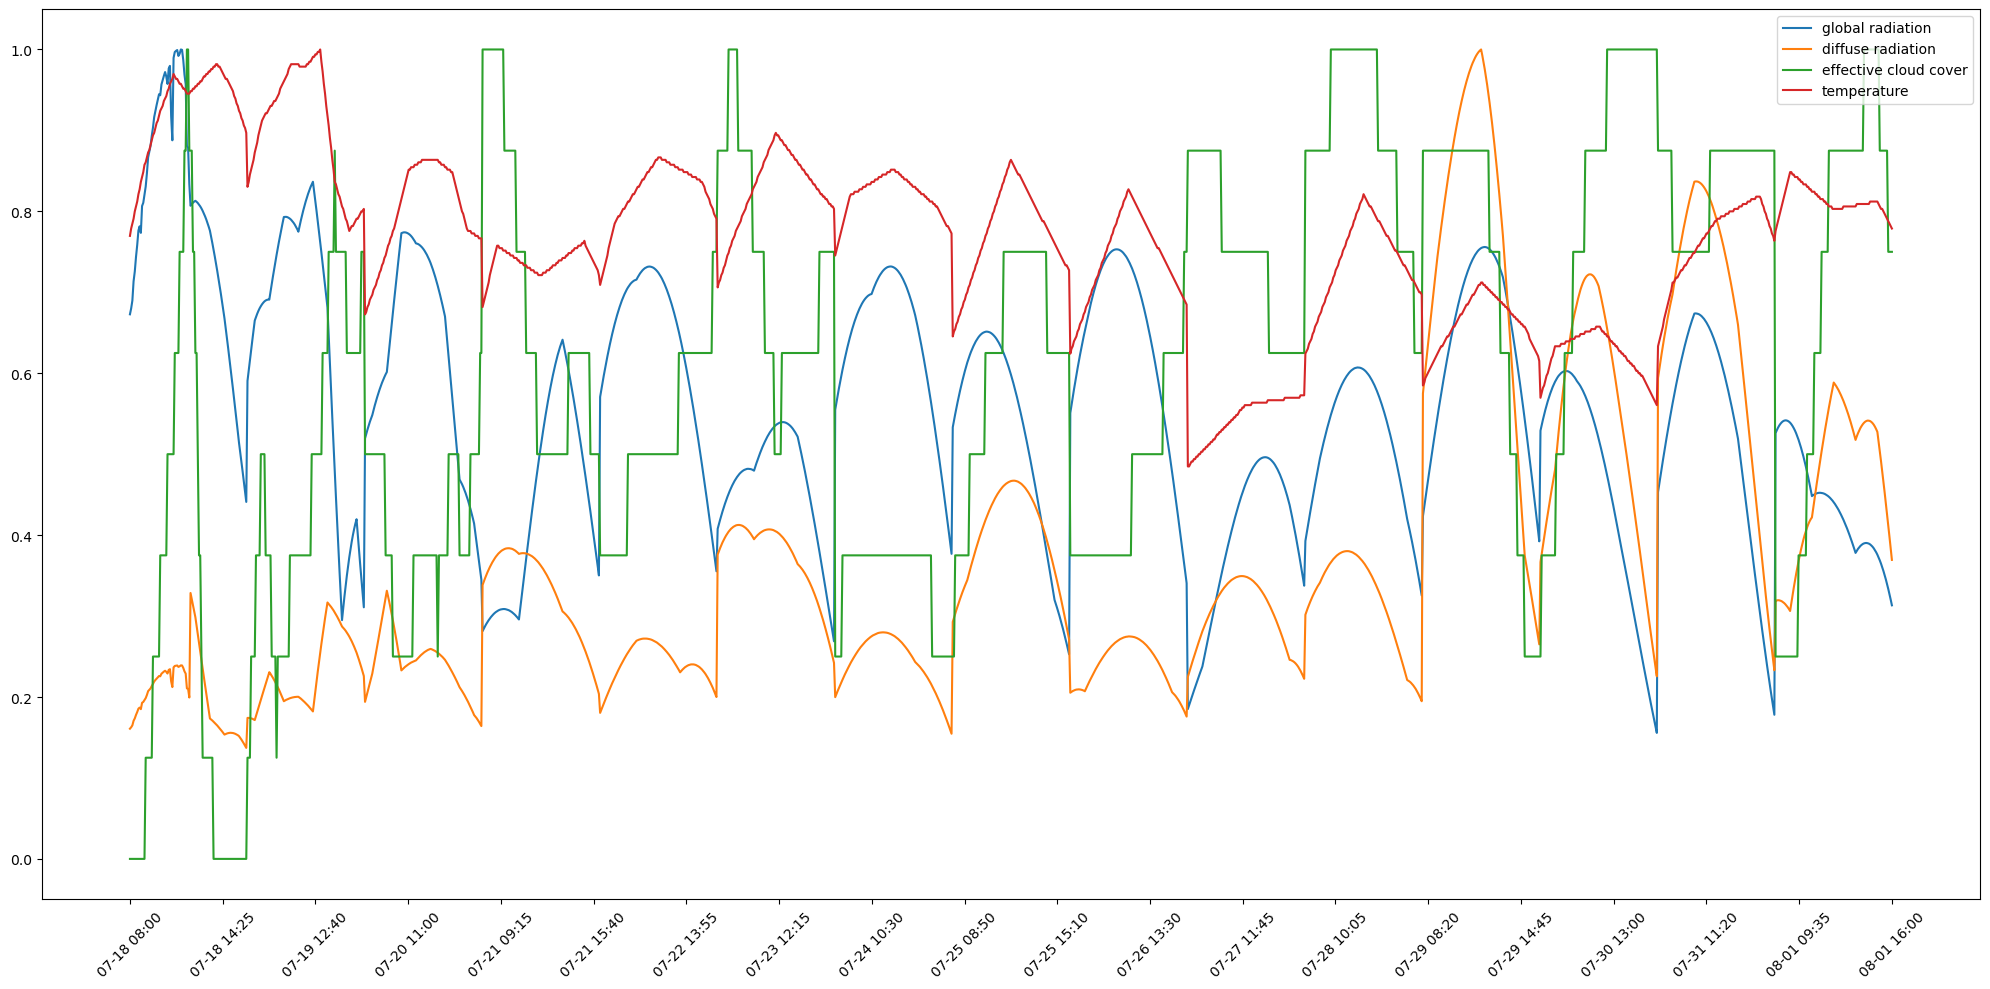

In [141]:
# keep only values where time is between 08:00 and 16:00
df = df[(df['time'] >= '08:00') & (df['time'] <= '16:00')]

# make diffuse_rad:W to be between 0 and 1
df['global_rad:W'] = df['global_rad:W'] / df['global_rad:W'].max()
df['diffuse_rad:W'] = df['diffuse_rad:W'] / df['diffuse_rad:W'].max()
df['effective_cloud_cover:octas'] = df['effective_cloud_cover:octas'] / df['effective_cloud_cover:octas'].max()
df['t_0m:C'] = df['t_0m:C'] / df['t_0m:C'].max()

plt.figure(figsize=(20,10))
plt.plot(df['datetime'], df['global_rad:W'], label='global radiation')
plt.plot(df['datetime'], df['diffuse_rad:W'], label='diffuse radiation')
plt.plot(df['datetime'], df['effective_cloud_cover:octas'], label='effective cloud cover')
plt.plot(df['datetime'], df['t_0m:C'], label='temperature')
# tilt the x-axis labels by 45 degrees
# make a total of 20 ticks spaced evenly between the first and last tick string values
plt.xticks(rotation=45)
plt.xticks(np.linspace(0, len(df['datetime'])-1, 20))

plt.legend(loc='upper right')
plt.tight_layout()
plt.show();